In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#df = pd.read_csv("data.csv",delimiter=";")
df = pd.read_csv("./datasets/superstore.csv")
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [4]:
df.describe()

,row_id,postal_code,sales,quantity,discount,profit,shipping_cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [5]:
print (df.shape)
df.columns

(51290, 24)


Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'postal_code', 'market', 'region', 'product_id', 'category',
       'sub-category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

In [6]:
df_na = df.isna().sum()

In [7]:
df.groupby(["ship_mode","order_priority",'category'])[['sales', 'discount',
       'profit', 'shipping_cost']].mean()


sales  discount  \
ship_mode      order_priority category                                
First Class    Critical       Furniture        397.129866  0.141818   
                              Office Supplies  126.661999  0.143469   
                              Technology       437.447099  0.138320   
               High           Furniture        424.920079  0.172163   
                              Office Supplies  115.624122  0.143573   
                              Technology       460.547588  0.152458   
               Medium         Furniture        400.513321  0.176460   
                              Office Supplies  125.341824  0.146989   
                              Technology       491.820949  0.139621   
Same Day       Critical       Furniture        419.771417  0.152520   
                              Office Supplies  112.804900  0.116939   
                              Technology       518.155856  0.147551   
               High           Furniture        384.110905  0.178008   
                              Office Supplies  118.595921  0.150946   
                              Technology       519.354052  0.151386   
               Medium         Furniture        385.767780  0.149440   
                              Office Supplies  119.950161  0.120845   
                              Technology       533.849345  0.168388   
Second Class   Critical       Furniture        450.873581  0.165630   
                              Office Supplies  140.202417  0.128545   
                              Technology       514.018533  0.122347   
               High           Furniture        410.641145  0.167645   
                              Office Supplies  124.408998  0.130549   
                              Technology       452.282938  0.133598   
               Medium         Furniture        409.779197  0.183231   
                              Office Supplies  124.993217  0.136840   
                              Technology       463.811286  0.130084   
Standard Class High           Furniture        418.480085  0.167881   
                              Office Supplies  118.711433  0.135630   
                              Technology       477.186871  0.128576   
               Low            Furniture        406.804642  0.173208   
                              Office Supplies  118.313119  0.137909   
                              Technology       430.105449  0.123917   
               Medium         Furniture        421.722499  0.165310   
                              Office Supplies  119.771989  0.137909   
                              Technology       463.985534  0.135305   

                                                  profit  shipping_cost  
ship_mode      order_priority category                                   
First Class    Critical       Furniture        53.093399     107.268416  
                              Office Supplies  14.515780      29.068152  
                              Technology       66.307764     112.768609  
               High           Furniture        26.721000      68.259953  
                              Office Supplies  13.958560      19.305089  
                              Technology       54.774336      73.541304  
               Medium         Furniture        23.572242      50.295398  
                              Office Supplies  18.242413      14.673477  
                              Technology       69.365351      53.727946  
Same Day       Critical       Furniture        44.377157     110.746299  
                              Office Supplies  19.928010      29.417736  
                              Technology       31.068475     136.756884  
               High           Furniture        31.185541      59.716289  
                              Office Supplies  14.810819      18.430078  
                              Technology       61.419839      86.366598  
               Medium         Furniture        41.424208      42.934400  
                     

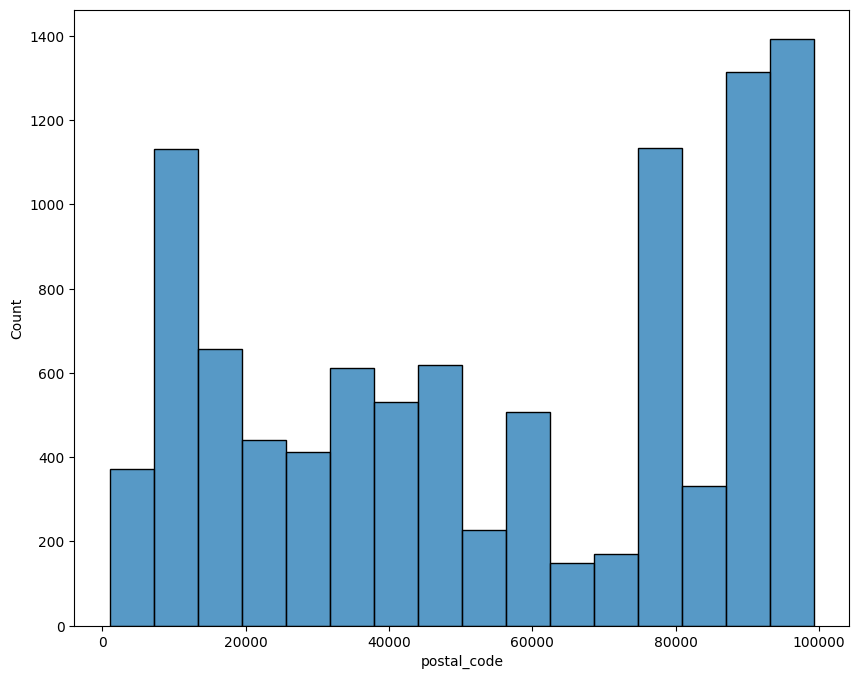

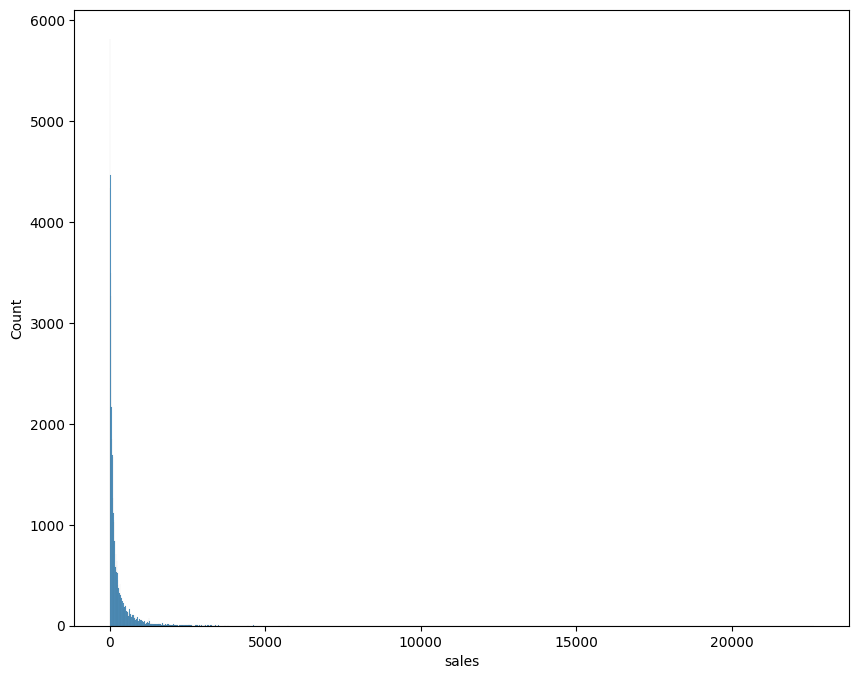

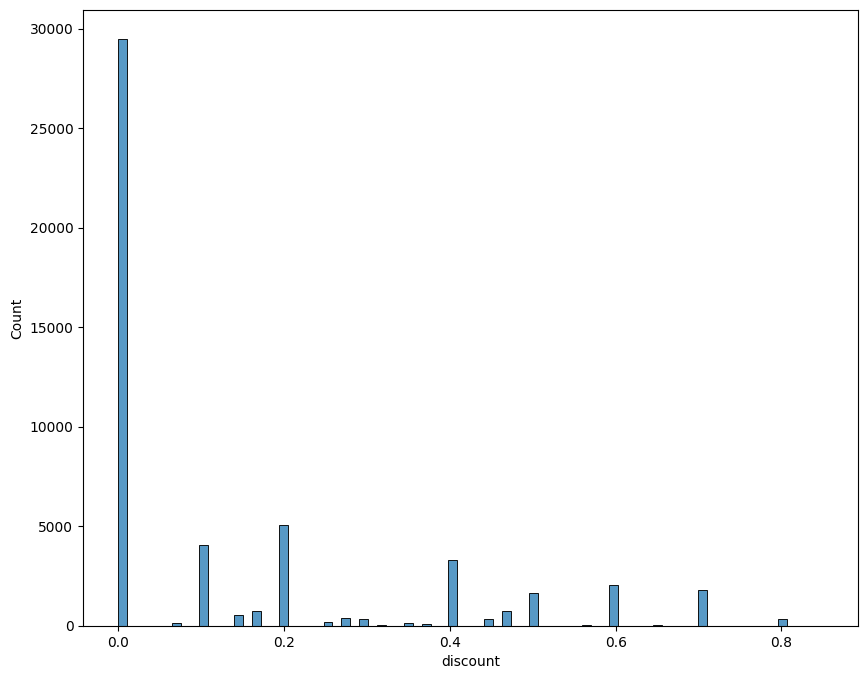

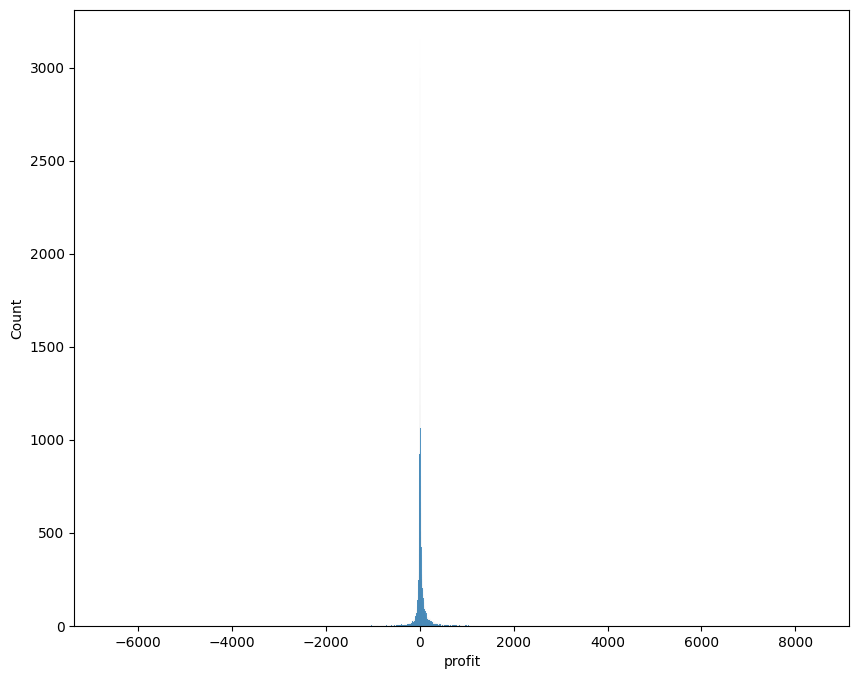

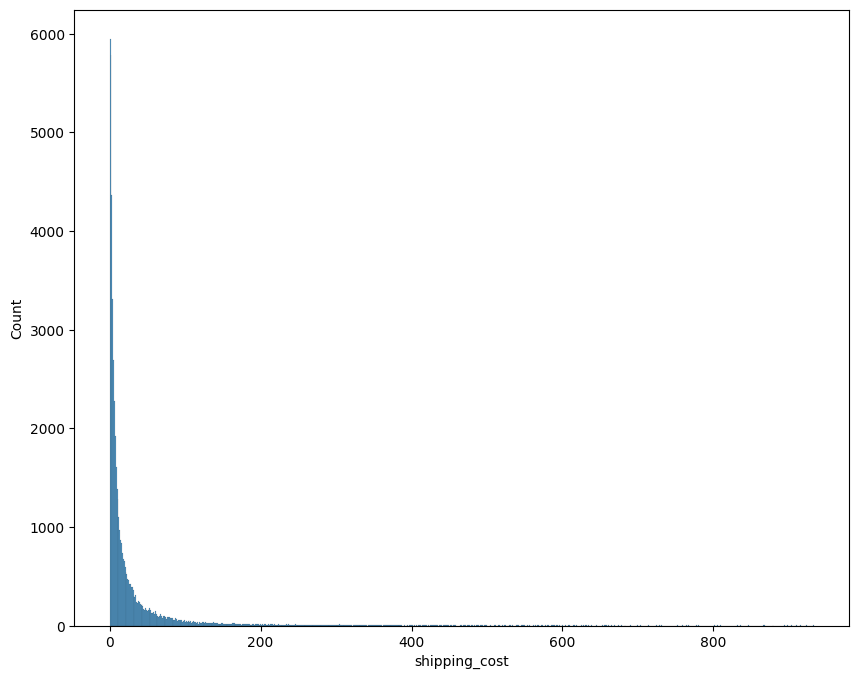

In [8]:
columnas_float = df.select_dtypes(include='float').columns.tolist()
for i in columnas_float:
    plt.figure(figsize=(10, 8))
    sns.histplot(df[i])
    plt.show()
    

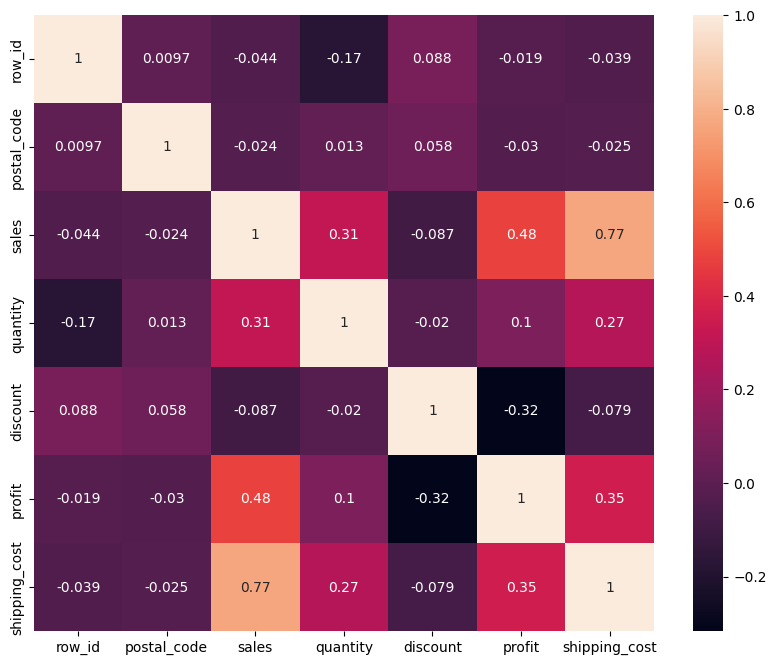

In [9]:

matrix_corr = df.corr(method="pearson",numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_corr, annot=True)
plt.show()

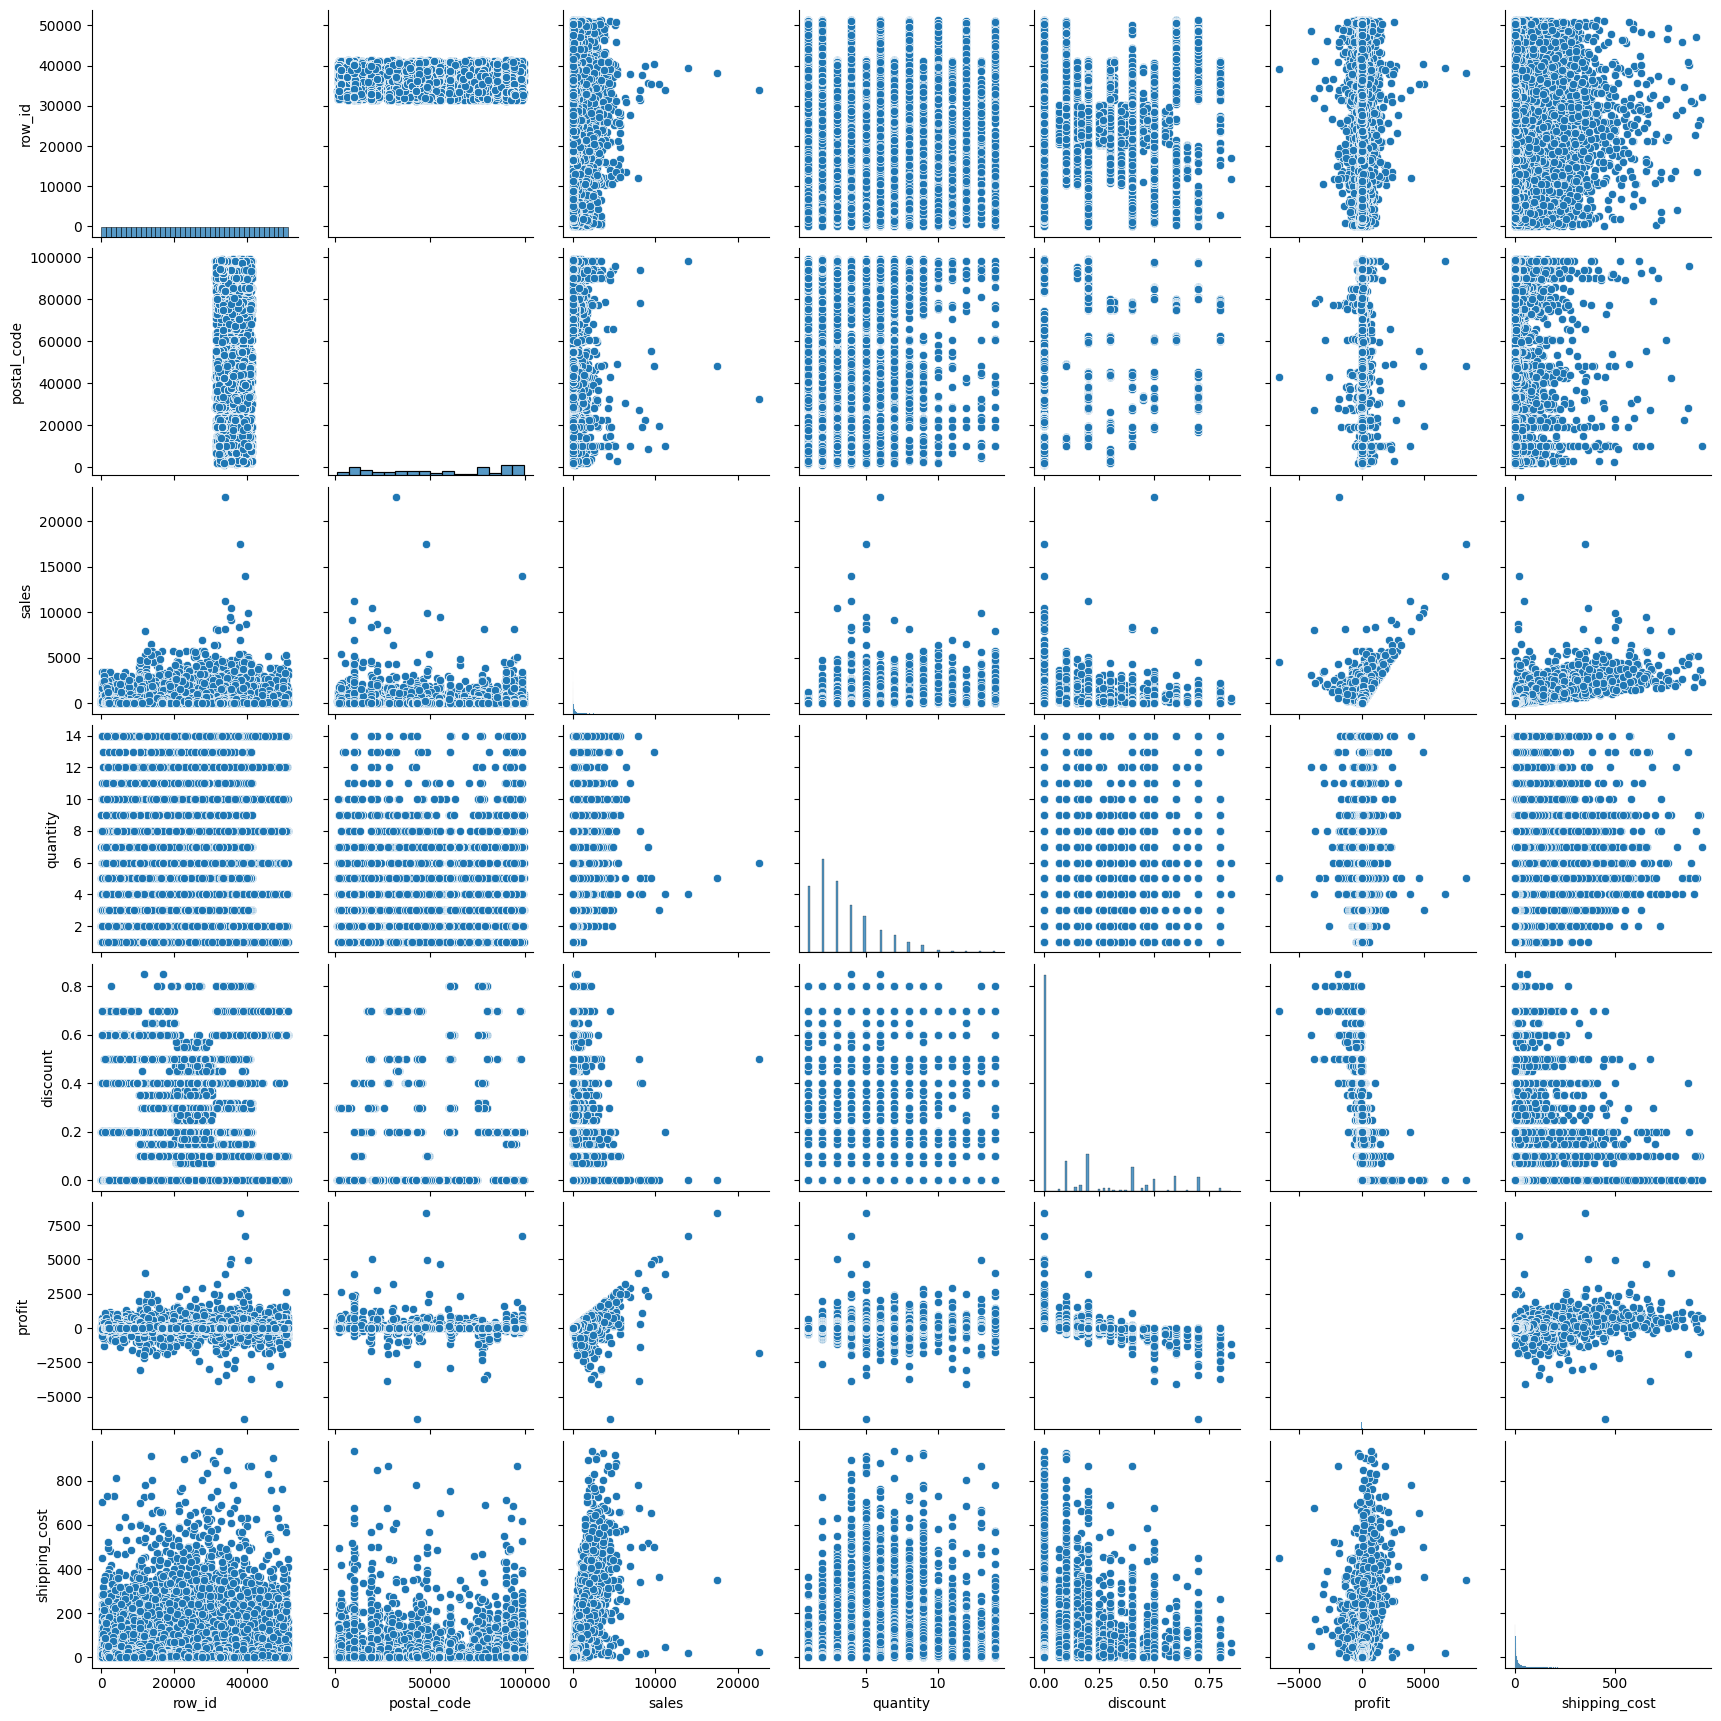

In [10]:
sns.pairplot(df)

In [11]:
def facttorial ():
    n = int(input("Enter the number: "))
    fact = 1
    for i in range(1,n+1):
        fact = fact * i
    print(fact)

In [ ]:
def facttorial ():
    n = int(input("Enter the number: "))
    fact = 1
    for i in range(1,n+1):
        fact = fact * i
    print(fact)